<a href="https://colab.research.google.com/github/hugoplm/bitcoin-candlestick/blob/main/4_Exercicio_DeepLearning_Paissagem/DL_Paissagem_Modelo2_Hugo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Baixando os Dados

In [21]:
!pip install -Uqqq gdown

In [22]:
!gdown 1ORgjWsWnGHdmi7wOZZV64GbQNE4SXkh7

Downloading...
From: https://drive.google.com/uc?id=1ORgjWsWnGHdmi7wOZZV64GbQNE4SXkh7
To: /content/seg_train.zip
100% 215M/215M [00:03<00:00, 68.1MB/s]


In [23]:
import shutil

In [24]:
shutil.unpack_archive('seg_train.zip', 'data')

# Carregando os Dados

In [25]:
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [26]:
path = "/content/data/seg_train/**/*.jpg"

In [27]:
X = []
y = []

for files in glob.glob(path, recursive=True):
  image = cv2.imread(files)
  image = cv2.resize(image, (125,125))
  X.append(image)
  y.append(files.split('/')[-2])

In [28]:
X = np.array(X)
y = np.array(y)
print(X.shape)
print(y.shape)

(14034, 125, 125, 3)
(14034,)


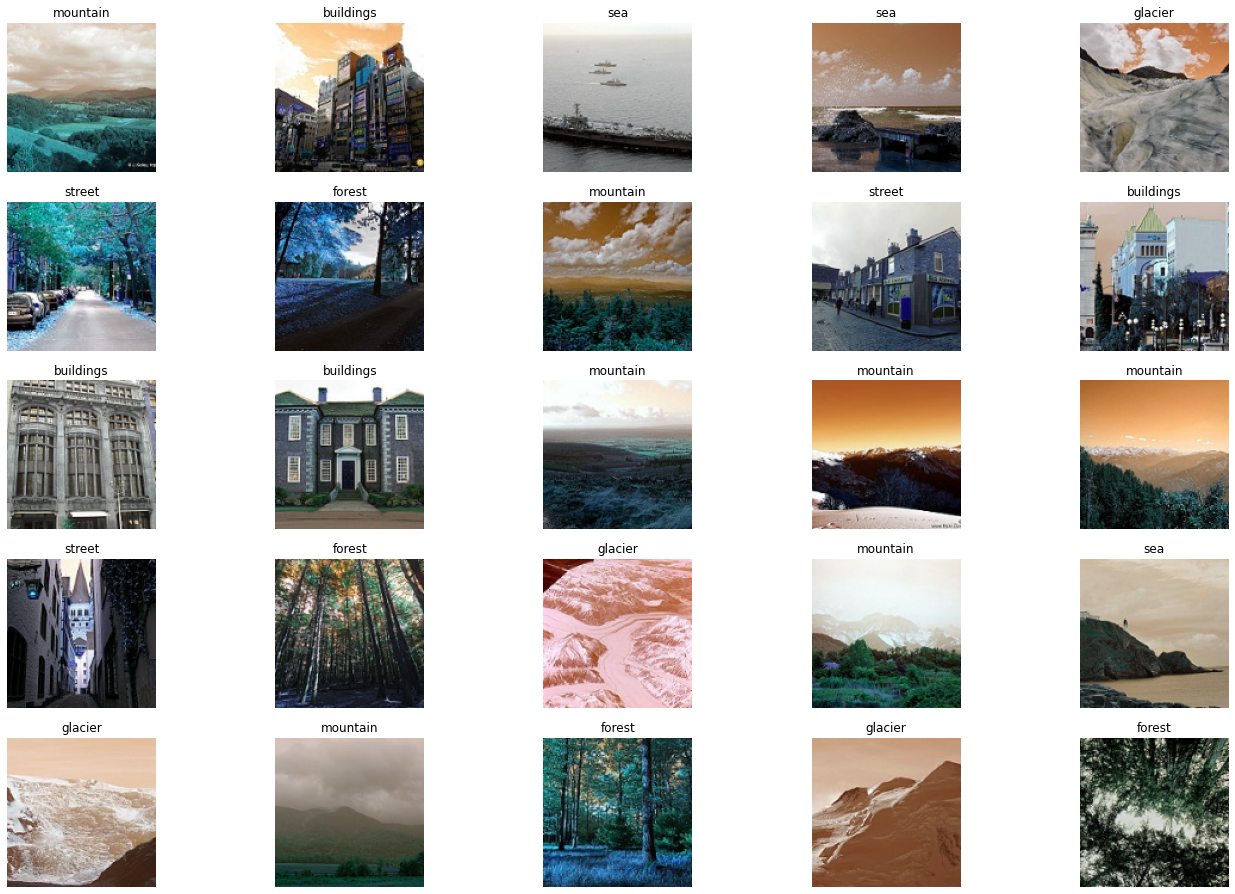

In [29]:
f, ax = plt.subplots(5,5)
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
  for j in range(0,5,1):
    rnd_number = randint(0,len(X))
    ax[i,j].imshow(X[rnd_number])
    ax[i,j].set_title(y[rnd_number])
    ax[i,j].axis('off')

# Pré-processamento dos Dados

In [30]:
X_train, X_val, y_train, y_val = train_test_split(
     X, y, stratify=y, test_size=0.33, random_state=42)

In [31]:
hot = OneHotEncoder()
y_train = hot.fit_transform(y_train.reshape(-1,1)).toarray()
y_val = hot.transform(y_val.reshape(-1,1)).toarray()

In [32]:
X_train = X_train / 255
X_val = X_val / 255

Distribuição das Classes

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


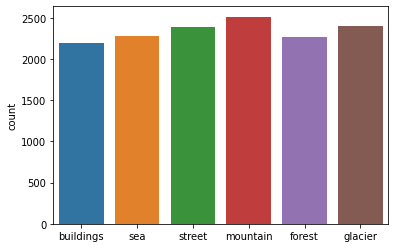

In [33]:
import seaborn as sns
sns.countplot(y);

#Modelo Deep Learning

## Carregando as Bibliotecas

In [34]:
from tensorflow.python.keras.layers import Input, Dense, Activation, Dropout, Flatten
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.callbacks import EarlyStopping

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## Modelo 2

Maior quantidade de camadas (mantendo a quantidade de neurônios)

### Definição da Arquitetura

In [35]:
rede = Sequential()

rede.add(Flatten())
rede.add(Dense(25,  input_dim = X_train.shape[1]*X_train.shape[2]*X_train.shape[3]))
rede.add(Activation('relu'))
rede.add(Dense(25))
rede.add(Activation('relu'))
rede.add(Dense(25))
rede.add(Activation('relu'))
rede.add(Dense(25))
rede.add(Activation('relu'))
rede.add(Dense(25))
rede.add(Activation('relu'))
rede.add(Dense(6))
rede.add(Activation('softmax'))

In [36]:
es = EarlyStopping(monitor = 'val_loss', 
                   min_delta = 0.001, 
                   patience = 10, 
                   verbose = 1, 
                   mode = 'auto')

In [37]:
rede.compile(loss = 'categorical_crossentropy', 
              optimizer = 'Adam', 
              metrics=['accuracy'])

### Treinamento do Modelo

In [38]:
hist = rede.fit(X_train, 
                y_train, 
                epochs = 25,
                batch_size=32,
                verbose = 1,
                validation_data = (X_val, y_val),
                callbacks = [es])

Epoch 1/25
294/294 [==============================] - 7s 20ms/step - loss: 1.5473 - accuracy: 0.3926 - val_loss: 1.3614 - val_accuracy: 0.4782
Epoch 2/25
294/294 [==============================] - 5s 18ms/step - loss: 1.3476 - accuracy: 0.4766 - val_loss: 1.3467 - val_accuracy: 0.4771
Epoch 3/25
294/294 [==============================] - 5s 18ms/step - loss: 1.2866 - accuracy: 0.5034 - val_loss: 1.3108 - val_accuracy: 0.4853
Epoch 4/25
294/294 [==============================] - 5s 17ms/step - loss: 1.2212 - accuracy: 0.5237 - val_loss: 1.2066 - val_accuracy: 0.5415
Epoch 5/25
294/294 [==============================] - 5s 18ms/step - loss: 1.2245 - accuracy: 0.5260 - val_loss: 1.2272 - val_accuracy: 0.5326
Epoch 6/25
294/294 [==============================] - 5s 18ms/step - loss: 1.1505 - accuracy: 0.5556 - val_loss: 1.1605 - val_accuracy: 0.5572
Epoch 7/25
294/294 [==============================] - 5s 17ms/step - loss: 1.1285 - accuracy: 0.5657 - val_loss: 1.2020 - val_accuracy: 0.5432

### Avaliação do Modelo

In [39]:
pred = rede.predict(X_val)

accuracy_score(y_val.argmax(1), pred.argmax(1))

0.5554835924006909

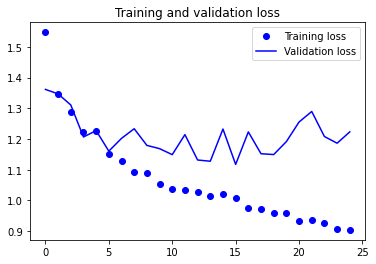

In [40]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()